<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features.

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classification problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [169]:
breast_cancer_csv = r'C:\Users\ryant\Desktop\IOD\DATA\breast-cancer-wisconsin-data.csv'
bc = pd.read_csv(breast_cancer_csv, index_col = 0)
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


### 2. EDA

- Explore dataset. Clean data (if required)
- Find features to predict class

In [11]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [171]:
bc.drop(['Unnamed: 32'], axis=1, inplace=True) #Drop the last column as it has all null values.

In [173]:
bc['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [175]:
bc.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [179]:
sorted_pairs = mask_corr.unstack().sort_values(ascending=False)

In [181]:
top_n = 30  #top correlated features
top_corr = sorted_pairs.head(top_n)

In [183]:
top_corr # a lot of the features are very highly correlated. However we will not drop any as we can see how it fits into the model.

radius_mean          perimeter_mean          0.997855
radius_worst         perimeter_worst         0.993708
radius_mean          area_mean               0.987357
perimeter_mean       area_mean               0.986507
radius_worst         area_worst              0.984015
perimeter_worst      area_worst              0.977578
radius_se            perimeter_se            0.972794
perimeter_mean       perimeter_worst         0.970387
radius_mean          radius_worst            0.969539
perimeter_mean       radius_worst            0.969476
radius_mean          perimeter_worst         0.965137
area_mean            radius_worst            0.962746
                     area_worst              0.959213
                     perimeter_worst         0.959120
radius_se            area_se                 0.951830
perimeter_mean       area_worst              0.941550
radius_mean          area_worst              0.941082
perimeter_se         area_se                 0.937655
concavity_mean       concave

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [185]:
# Define X and y
y = bc['diagnosis'] #target feature
X = bc.drop(columns='diagnosis') #all features except for diagnosis

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.951048951048951

In [191]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy =' , accuracy)

Accuracy = 0.951048951048951


In [193]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           B       0.96      0.97      0.96        90
           M       0.94      0.92      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



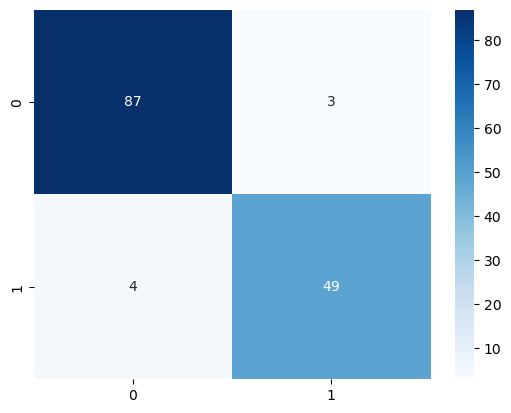

In [195]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [331]:
from sklearn.svm import SVC
svm = SVC(probability=True)

In [197]:
bc['diagnosis'] = bc['diagnosis'].map({'M': 1, 'B': 0}) #Change diagnosis column to binary

In [335]:
y = bc['diagnosis'] #target feature post changed to binary
X = bc.drop(columns='diagnosis') #all features except for diagnosis

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9020979020979021

In [339]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy =' , accuracy)

Accuracy = 0.9020979020979021


In [341]:
cr_svm = classification_report(y_test, y_pred)
print(cr_svm)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        90
           1       0.93      0.79      0.86        53

    accuracy                           0.90       143
   macro avg       0.91      0.88      0.89       143
weighted avg       0.90      0.90      0.90       143



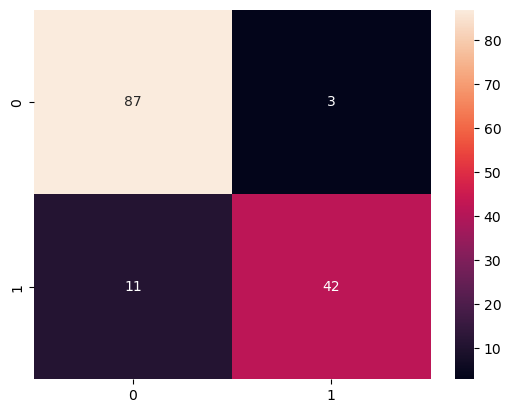

In [247]:
cm_svm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_svm, annot=True)
plt.show()

### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [237]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [239]:
y = bc['diagnosis'] #target feature
X = bc.drop(columns='diagnosis') #all other features

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.9370629370629371

In [243]:
y_pred_nb = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_nb)
print('Accuracy =' , accuracy)

Accuracy = 0.9370629370629371


In [245]:
cr_nb = classification_report(y_test, y_pred_nb)
print(cr_nb)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        90
           1       0.94      0.89      0.91        53

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



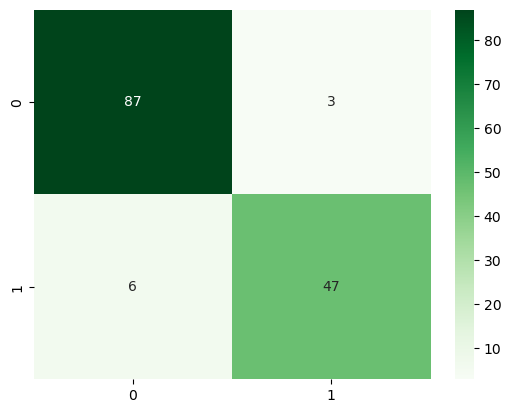

In [251]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, cmap="Greens")
plt.show()

### 6 Gridsearch optimal parameters for Logistic Regression and SVM models

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid search to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression

Find out how these parameters effect model. Find out the best estimator, score.

In [281]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [283]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}
lr_gs = GridSearchCV(logreg, lr_params, cv=5, verbose=3)

In [285]:
lr_gs.fit (X_train, y_train)
lr_gs.score(X_test, y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l2;, score=0.977 total time=   0.2s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.953 total time=   0.1s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.965 total time=   0.1s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.906 total time=   0.1s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.941 total time=   0.2s
[CV 1/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....................C=10, penalty=l1

0.9440559440559441

In [314]:
lr_gs.best_estimator_
print('Best parameters =', lr_gs.best_params_)
print('Average score of the best parameters =', lr_gs.best_score_)

Best parameters = {'C': 100, 'penalty': 'l2'}
Average score of the best parameters = 0.9623803009575923


#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [317]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}
lr_svm = GridSearchCV(svm, svc_params, cv=5, verbose=3)

In [319]:
lr_svm.fit (X_train, y_train)
lr_svm.score(X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.988 total time=   0.4s
[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.965 total time=   0.6s
[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.953 total time=   0.3s
[CV 4/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.929 total time=   0.4s
[CV 5/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.953 total time=   0.5s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.965 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.941 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.941 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.859 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.965 total time=   0.0s
[CV 1/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.988 total time=   0.4s
[CV 2/5] END ..C=1, gamma=0.0001, kernel=linear;

0.9440559440559441

In [321]:
lr_svm.best_estimator_
print('Best parameters =', lr_svm.best_params_)
print('Average score of the best parameters =', lr_svm.best_score_)

Best parameters = {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
Average score of the best parameters = 0.9623803009575923


#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

In [372]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [343]:
yhat_pp_lin = logreg.predict_proba(X_test)
yhat_pp_svm = svm.predict_proba(X_test)
yhat_pp_nb = nb.predict_proba(X_test)

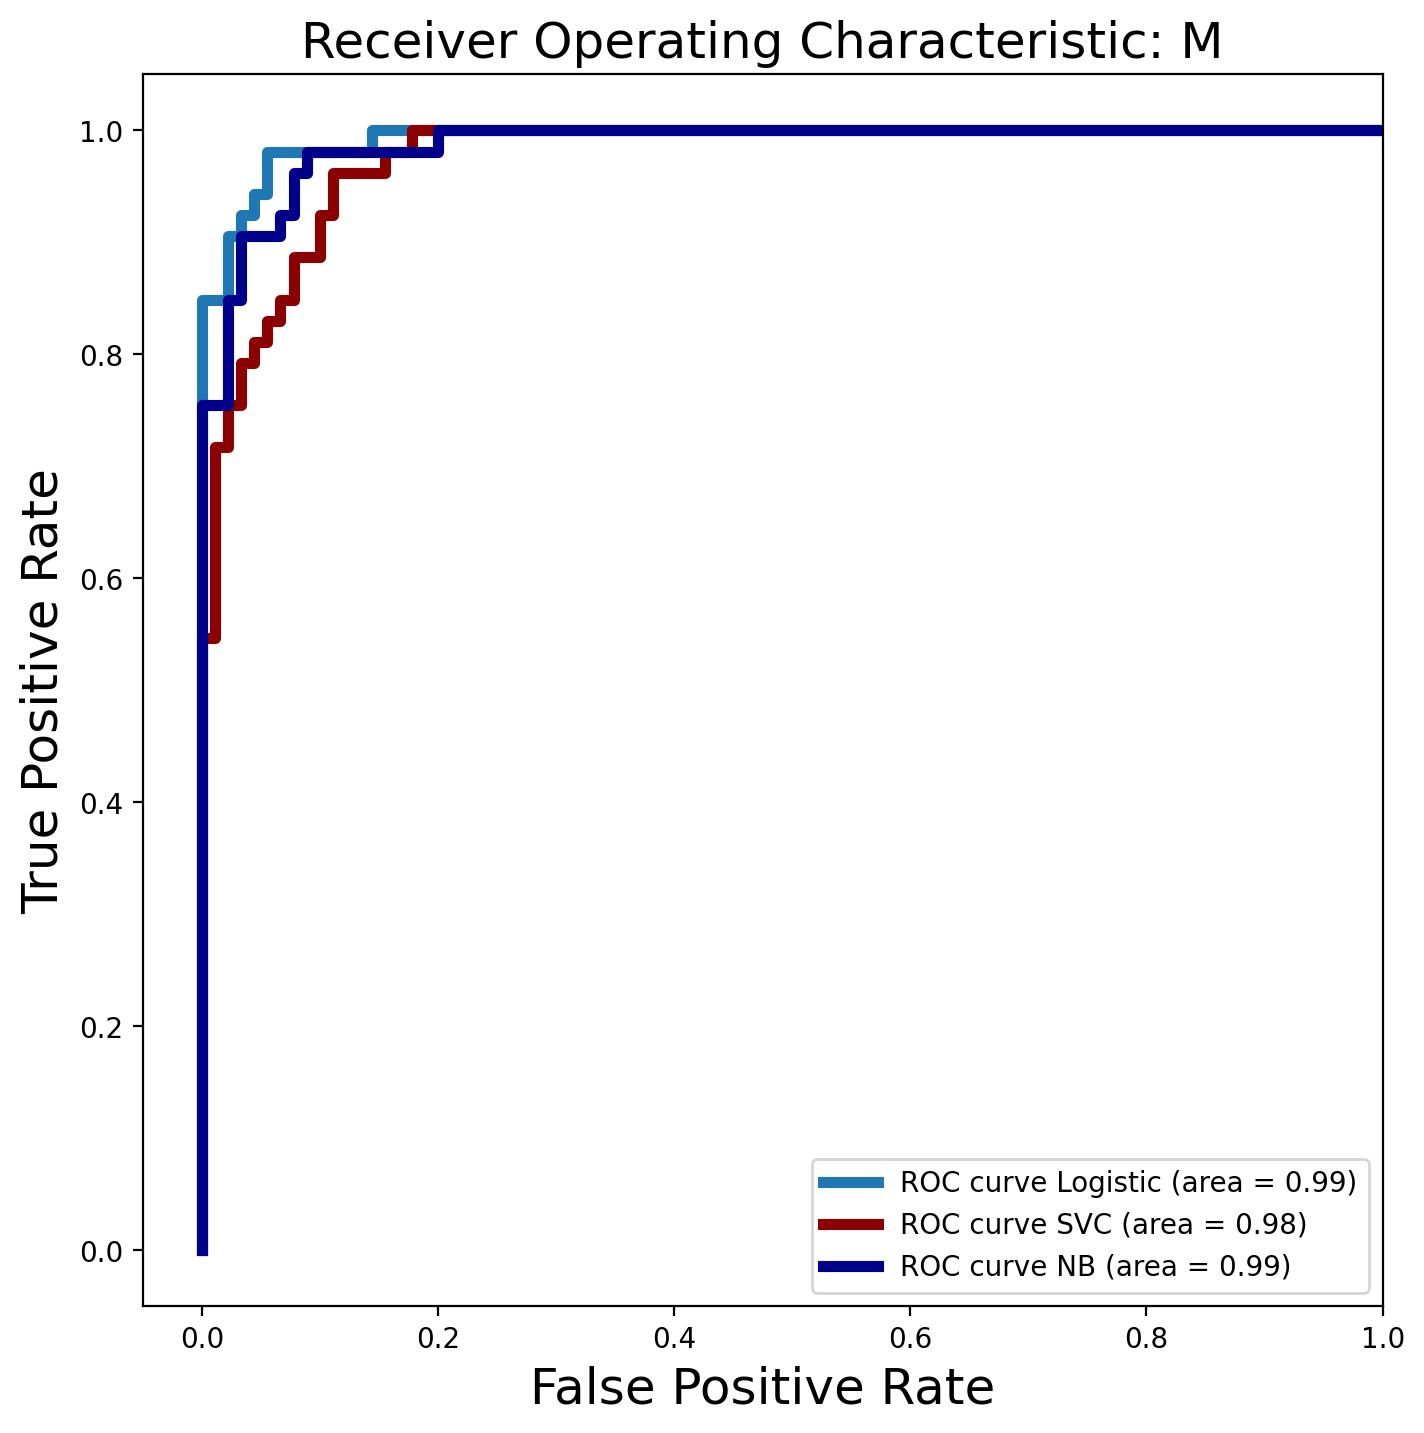

In [376]:
fpr_lin, tpr_lin, _ = roc_curve(y_test, yhat_pp_lin[:,1])
fpr_svm, tpr_svm, _ = roc_curve(y_test, yhat_pp_svm[:,1])
fpr_nb, tpr_nb, _ = roc_curve(y_test, yhat_pp_nb[:,1])

plt.figure(figsize=[8,8])
plt.plot(fpr_lin, tpr_lin, label='ROC curve Logistic (area = %0.2f)' % auc(fpr_lin, tpr_lin), linewidth=4)
plt.plot(fpr_svm, tpr_svm, label='ROC curve SVC (area = %0.2f)' % auc(fpr_svm, tpr_svm), linewidth=4, color='darkred')
plt.plot(fpr_nb, tpr_nb, label='ROC curve NB (area = %0.2f)' % auc(fpr_nb, tpr_nb), linewidth=4, color='darkblue')

plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 7. [BONUS] Learning Curve

A learning curve compares the validation and training performance of an estimator for varying amounts of training data. If both the validation and training score converge to a value that is too low, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



